In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.preprocessing import LabelEncoder


path = kagglehub.dataset_download("minahilfatima12328/lifestyle-and-sleep-patterns")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'lifestyle-and-sleep-patterns' dataset.
Path to dataset files: /kaggle/input/lifestyle-and-sleep-patterns


In [ ]:
df = pd.read_csv("/kaggle/input/lifestyle-and-sleep-patterns/Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# fazer o que?


In [ ]:
import plotly.express as px
import pandas as pd

cols = ['Age', 'Occupation', 'Quality of Sleep', 'Sleep Duration',
        'Stress Level', 'BMI Category', 'Sleep Disorder']


fig = px.histogram(
    df,
    x=cols[0],
    nbins=20,
    marginal="box",
    title=f"Distribuição de {cols[0]}"
)


fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label=col,
                    method="update",
                    args=[{"x": [df[col]], "xbins": {"size": None}},
                          {"title": f"Distribuição de {col}",
                           "xaxis.title.text": col}]
                )
                for col in cols
            ],
            direction="down",
            x=1.5,
            xanchor="center",
            y=1.15,
            yanchor="top"
        )
    ]
)

fig.show()

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

cols_to_plot = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Occupation', 'BMI Category']
df_filtered = df[cols_to_plot]

num_cols = df_filtered.select_dtypes(include=np.number).columns.tolist()

fig = go.Figure()

for i, col in enumerate(num_cols):
    x = df_filtered[col].dropna()


    counts, bins = np.histogram(x, bins=19)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])


    kde = gaussian_kde(x)
    x_range = np.linspace(x.min(), x.max(), 200)
    y_kde = kde(x_range)

    y_kde_scaled = y_kde * len(x) * (bins[1] - bins[0])


    hist = go.Bar(
        x=bin_centers,
        y=counts,
        name=f"{col} - Histograma",
        opacity=0.6,
        marker=dict(color='lightblue', line=dict(color='white', width=1)),
        visible=(i == 0)
    )

    line = go.Scatter(
        x=x_range,
        y=y_kde_scaled,
        mode='lines',
        name=f"{col} - Linha suavizada",
        line=dict(color='black', width=2),
        visible=(i == 0)
    )

    fig.add_trace(hist)
    fig.add_trace(line)

buttons = []
for i, col in enumerate(num_cols):
    visible = [False] * (2 * len(num_cols))
    visible[2*i] = True
    visible[2*i + 1] = True
    buttons.append(dict(
        label=col,
        method="update",
        args=[{"visible": visible},
              {"title": f"Distribuição de {col}",
               "xaxis.title.text": col,
               "yaxis.title.text": "Frequência"}]
    ))


fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        x=0.5,
        xanchor="center",
        y=1.15,
        yanchor="top"
    )],
    title=f"Distribuição de {num_cols[0]}",
    xaxis_title=num_cols[0],
    yaxis_title="Frequência",
    bargap=0.05,
    template="simple_white",
    height=500
)

fig.show()

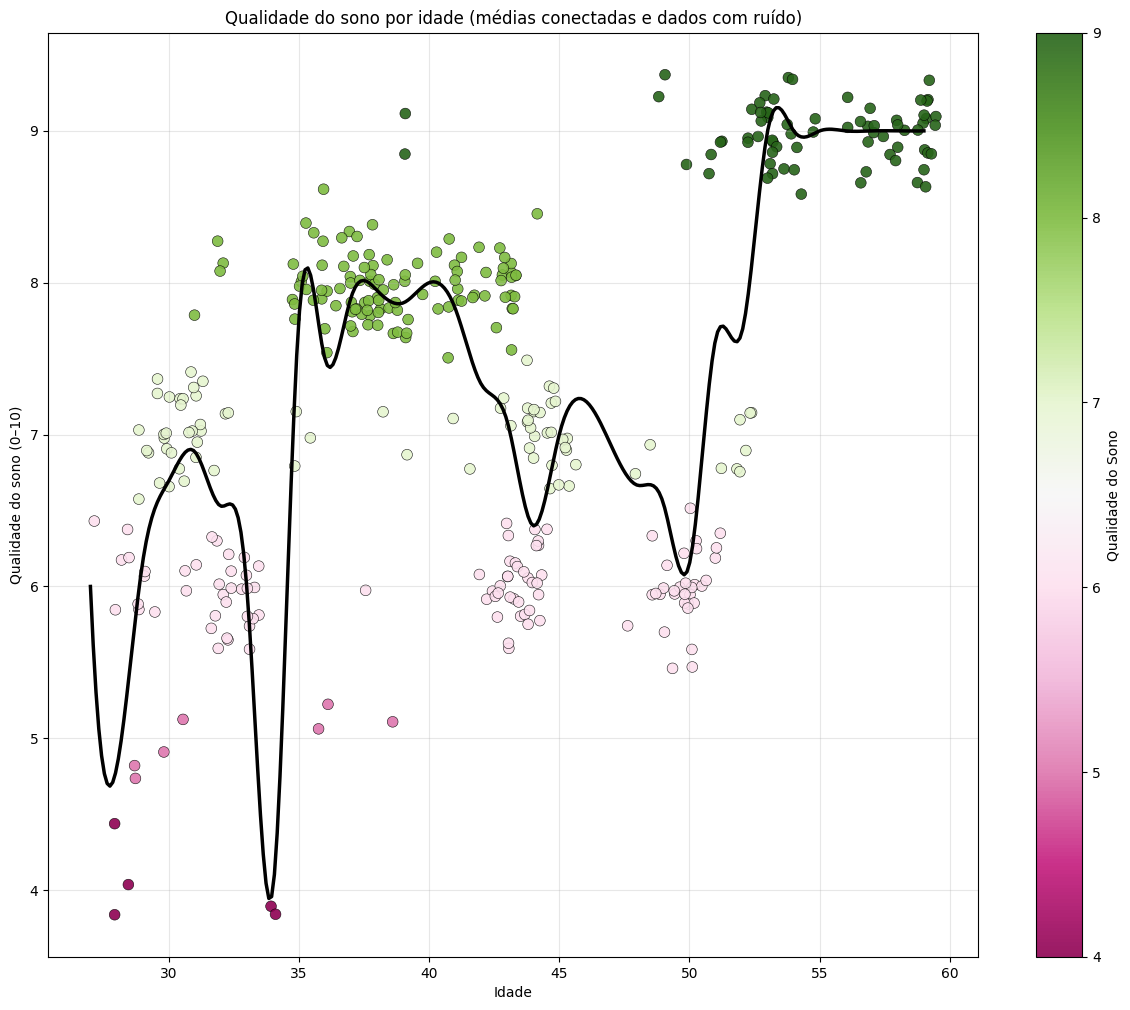

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


np.random.seed(42)


idades_noise = df['Age'] + np.random.normal(0, 0.3, size=len(df))
qualidade_noise = df['Quality of Sleep'] + np.random.normal(0, 0.2, size=len(df))

df_media = (
    df.groupby('Age')[['Quality of Sleep']]
      .mean()
      .reset_index()
)

idades_med = df_media['Age']
qualidade_med = df_media['Quality of Sleep']

norm = plt.Normalize(vmin=df['Quality of Sleep'].min(), vmax=df['Quality of Sleep'].max())
cmap = cm.PiYG

fig, ax = plt.subplots(figsize=(15, 12))

from scipy.interpolate import make_interp_spline

x_smooth = np.linspace(idades_med.min(), idades_med.max(), 300)
spl = make_interp_spline(idades_med, qualidade_med, k=3)
y_smooth = spl(x_smooth)

ax.plot(x_smooth, y_smooth, color='black', linewidth=2.5)


sc = ax.scatter(idades_noise, qualidade_noise,
                c=df['Quality of Sleep'], cmap=cmap,
                s=60, edgecolor='black', linewidth=0.4, alpha=0.9)


cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Qualidade do Sono')

ax.set_title('Qualidade do sono por idade (médias conectadas e dados com ruído)')
ax.set_xlabel('Idade')
ax.set_ylabel('Qualidade do sono (0–10)')
ax.grid(True, alpha=0.3)

plt.show()




#Plot com Hover, pergunta idade X qualidade sono, **pergunta 1**


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from scipy.interpolate import make_interp_spline
import numpy as np

df_filtrado = pd.read_csv("/kaggle/input/lifestyle-and-sleep-patterns/Sleep_health_and_lifestyle_dataset.csv")



df_filtrado['Age_noise'] = df_filtrado['Age'] + np.random.normal(0, 0.3, size=len(df_filtrado))
df_filtrado['Quality_noise'] = df_filtrado['Quality of Sleep'] + np.random.normal(0, 0.2, size=len(df_filtrado))


fig = px.scatter(
    df_filtrado,
    x='Age_noise',
    y='Quality_noise',
    color='Quality of Sleep',
    hover_name='Person ID',
    hover_data={
        'Age_noise': False,
        'Quality_noise': False,
        'Age': True,
        'Quality of Sleep': True,
        'Occupation': True,
        'Stress Level': True,
        'Sleep Duration': True,
        'BMI Category': True,
        'Sleep Disorder': True,
    },
    title='Qualidade do sono por idade (dados com ruído e interativo)',
    labels={
        'Age_noise': 'Idade',
        'Quality_noise': 'Qualidade do sono (0–10)',
        'Quality of Sleep': 'Qualidade do Sono'
    },
    color_continuous_scale=px.colors.diverging.PiYG
)

df_media = (
    df_filtrado.groupby('Age')[['Quality of Sleep']]
      .mean()
      .reset_index()
      .sort_values('Age')
)


ages_med = df_media['Age'].values
quality_med = df_media['Quality of Sleep'].values


x_smooth = np.linspace(ages_med.min(), ages_med.max(), 300)


spl = make_interp_spline(ages_med, quality_med, k=1)

y_smooth = spl(x_smooth)


fig.add_trace(go.Scatter(
    x=x_smooth,
    y=y_smooth,
    mode='lines',
    name='Média da Qualidade do Sono (p.i. grau 3)',
    line=dict(color='black', width=2.5),
    hoverinfo = 'skip'
))

fig.update_traces(
    marker=dict(size=10, line=dict(width=0.4, color='black')),
    selector=dict(mode='markers')
)

fig.update_layout(
    xaxis_title='Idade',
    yaxis_title='Qualidade do sono (0–10)',
    title_x=0.5,
    height = 1000,
    legend=dict(
        x=1,
        y=1.02,
        xanchor='left',
        yanchor='top'
    )
)

fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from scipy.interpolate import make_interp_spline
import numpy as np

ids_para_omitir = [4, 5, 6, 81, 82]
df_filtrado = df[~df['Person ID'].isin(ids_para_omitir)].copy()


df_filtrado['Age_noise'] = df_filtrado['Age'] + np.random.normal(0, 0.3, size=len(df_filtrado))
df_filtrado['Quality_noise'] = df_filtrado['Quality of Sleep'] + np.random.normal(0, 0.2, size=len(df_filtrado))


fig = px.scatter(
    df_filtrado,
    x='Age_noise',
    y='Quality_noise',
    color='Quality of Sleep',
    hover_name='Person ID',
    hover_data={
        'Age_noise': False,
        'Quality_noise': False,
        'Age': True,
        'Quality of Sleep': True,
        'Occupation': True,
        'Stress Level': True,
        'Sleep Duration': True,
        'BMI Category': True,
        'Sleep Disorder': True,
    },
    title='Qualidade do sono por idade (dados com ruído e interativo)',
    labels={
        'Age_noise': 'Idade',
        'Quality_noise': 'Qualidade do sono (0–10)',
        'Quality of Sleep': 'Qualidade do Sono'
    },
    color_continuous_scale=px.colors.diverging.RdYlGn
)


df_media = (
    df_filtrado.groupby('Age')[['Quality of Sleep']]
      .mean()
      .reset_index()
      .sort_values('Age')
)

ages_med = df_media['Age'].values
quality_med = df_media['Quality of Sleep'].values


x_smooth = np.linspace(ages_med.min(), ages_med.max(), 300)


spl = make_interp_spline(ages_med, quality_med, k=3)

y_smooth = spl(x_smooth)


fig.add_trace(go.Scatter(
    x=x_smooth,
    y=y_smooth,
    mode='lines',
    name='Média da Qualidade do Sono (Suavizada)',
    line=dict(color='black', width=2.5),
    hoverinfo = 'skip'
))

fig.update_traces(
    marker=dict(size=10, line=dict(width=0.4, color='black')),
    selector=dict(mode='markers')
)

fig.update_layout(
    xaxis_title='Idade',
    yaxis_title='Qualidade do sono (0–10)',
    title_x=0.5,
    height = 1000,
    legend=dict(
        x=1,
        y=1.02,
        xanchor='left',
        yanchor='top'
    )
)

fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from scipy.interpolate import make_interp_spline
import numpy as np

ids_para_omitir = [81, 82]
df_filtrado = df[~df['Person ID'].isin(ids_para_omitir)].copy()


df_filtrado['Age_noise'] = df_filtrado['Age'] + np.random.normal(0, 0.3, size=len(df_filtrado))
df_filtrado['Quality_noise'] = df_filtrado['Quality of Sleep'] + np.random.normal(0, 0.2, size=len(df_filtrado))

fig = px.scatter(
    df_filtrado,
    x='Age_noise',
    y='Quality_noise',
    color='Quality of Sleep',
    hover_name='Person ID',
    hover_data={
        'Age_noise': False,
        'Quality_noise': False,
        'Age': True,
        'Quality of Sleep': True,
        'Occupation': True,
        'Stress Level': True,
        'Sleep Duration': True,
        'BMI Category': True,
        'Sleep Disorder': True,
    },
    title='Qualidade do sono por idade (dados com ruído e interativo)',
    labels={
        'Age_noise': 'Idade',
        'Quality_noise': 'Qualidade do sono (0–10)',
        'Quality of Sleep': 'Qualidade do Sono'
    },
    color_continuous_scale=px.colors.diverging.RdYlGn
)


df_media = (
    df_filtrado.groupby('Age')[['Quality of Sleep']]
      .mean()
      .reset_index()
      .sort_values('Age')
)

ages_med = df_media['Age'].values
quality_med = df_media['Quality of Sleep'].values


x_smooth = np.linspace(ages_med.min(), ages_med.max(), 300)


spl = make_interp_spline(ages_med, quality_med, k=3)


y_smooth = spl(x_smooth)


fig.add_trace(go.Scatter(
    x=x_smooth,
    y=y_smooth,
    mode='lines',
    name='Média da Qualidade do Sono (Suavizada)',
    line=dict(color='black', width=2.5),
    hoverinfo = 'skip'
))

fig.update_traces(
    marker=dict(size=10, line=dict(width=0.4, color='black')),
    selector=dict(mode='markers')
)

fig.update_layout(
    xaxis_title='Idade',
    yaxis_title='Qualidade do sono (0–10)',
    title_x=0.5,
    height = 1000,
    legend=dict(
        x=1,
        y=1.02,
        xanchor='left',
        yanchor='top'
    )
)

fig.show()

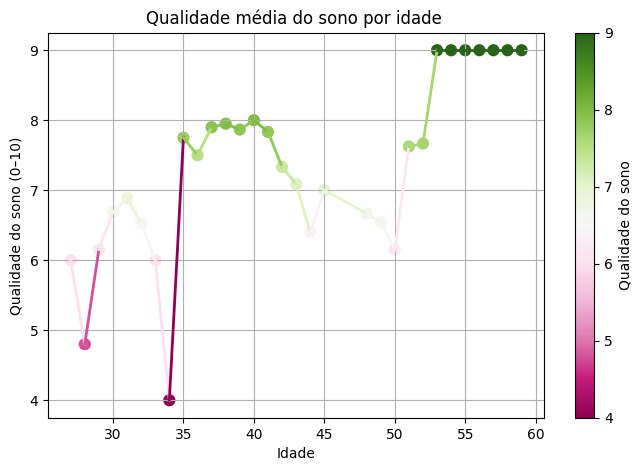

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


df_media = (
    df.groupby('Age')[['Quality of Sleep', 'Stress Level']]
      .mean()
      .reset_index()
)

idades = df_media['Age'].to_numpy()
qualidade = df_media['Quality of Sleep'].to_numpy()
stress = df_media['Stress Level'].to_numpy()


norm = plt.Normalize(vmin=qualidade.min(), vmax=qualidade.max())
cmap = cm.PiYG

plt.figure(figsize=(8, 5))
ax = plt.gca()


for i in range(len(idades) - 1):
    ax.plot(idades[i:i+2], qualidade[i:i+2],
            color=cmap(norm(qualidade[i])), linewidth=2)


sc = ax.scatter(idades, qualidade, c=qualidade, cmap=cmap, s=60)


cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Qualidade do sono')

ax.set_title('Qualidade média do sono por idade ')
ax.set_xlabel('Idade')
ax.set_ylabel('Qualidade do sono (0–10)')
ax.grid(True)

plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from scipy.interpolate import make_interp_spline
import numpy as np

ids_para_omitir = [1, 81, 82]

df_filtrado = df[~df['Person ID'].isin(ids_para_omitir)].copy()


df_filtrado['Age_noise'] = df_filtrado['Age'] + np.random.normal(0, 0.3, size=len(df_filtrado))
df_filtrado['Quality_noise'] = df_filtrado['Quality of Sleep'] + np.random.normal(0, 0.2, size=len(df_filtrado))


fig = px.scatter(
    df_filtrado,
    x='Age_noise',
    y='Quality_noise',
    color='Quality of Sleep',
    hover_name='Person ID',
    hover_data={
        'Age_noise': False,
        'Quality_noise': False,
        'Age': True,
        'Quality of Sleep': True,
        'Occupation': True,
        'Stress Level': True,
        'Sleep Duration': True,
        'BMI Category': True,
        'Sleep Disorder': True,
    },
    title='Qualidade do sono por idade (dados com ruído e interativo)',
    labels={
        'Age_noise': 'Idade',
        'Quality_noise': 'Qualidade do sono (0–10)',
        'Quality of Sleep': 'Qualidade do Sono'
    },
    color_continuous_scale=px.colors.diverging.RdYlGn
)


df_media = (
    df_filtrado.groupby('Age')[['Quality of Sleep']]
      .mean()
      .reset_index()
      .sort_values('Age')
)

ages_med = df_media['Age'].values
quality_med = df_media['Quality of Sleep'].values

x_smooth = np.linspace(ages_med.min(), ages_med.max(), 300)


spl = make_interp_spline(ages_med, quality_med, k=3)


y_smooth = spl(x_smooth)



fig.add_trace(go.Scatter(
    x=x_smooth,
    y=y_smooth,
    mode='lines',
    name='Média da Qualidade do Sono',
    line=dict(color='black', width=2.5),
    hoverinfo = 'skip'
))

fig.update_traces(
    marker=dict(size=10, line=dict(width=0.4, color='black')),
    selector=dict(mode='markers')
)

fig.update_layout(
    xaxis_title='Idade',
    yaxis_title='Qualidade do sono (0–10)',
    title_x=0.5,
    height = 1000,
    legend=dict(
        x=1,
        y=1.02,
        xanchor='left',
        yanchor='top'
    )
)

fig.show()

#Plot IMC X Doenças do sono **pergunta 3**

In [ ]:
import plotly.express as px


df['BMI Category'] = df['BMI Category'].replace({'Normal': 'Normal Weight'})
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Healthy')


crosstab_prop = pd.crosstab(
    index=df['BMI Category'],
    columns=df['Sleep Disorder'],
    normalize='index'
)

col_order = ['Healthy', 'Insomnia', 'Sleep Apnea']

col_order_filtered = [col for col in col_order if col in crosstab_prop.columns]
crosstab_prop = crosstab_prop[col_order_filtered]


data_melted = crosstab_prop.reset_index().melt(
    id_vars='BMI Category',
    value_vars=col_order_filtered,
    var_name='Sleep Disorder',
    value_name='Proportion'
)

bmi_order_list = ['Normal Weight', 'Overweight', 'Obese']
disorder_order_list = ['Healthy', 'Insomnia', 'Sleep Apnea']


color_map = {
    'Sleep Apnea': '#F44336',
    'Insomnia': '#FFC107',
    'Healthy': '#4CAF50'
}


fig = px.bar(
    data_melted,
    x='BMI Category',
    y='Proportion',
    color='Sleep Disorder',
    barmode='relative',

    title='Distribuição de Distúrbios do Sono por Categoria de IMC',
    labels={
        'Proportion': 'Proporção (%)',
        'BMI Category': 'Categoria de IMC',
        'Sleep Disorder': 'Distúrbio do Sono'
    },


    color_discrete_map=color_map,

    category_orders={
        'BMI Category': bmi_order_list,
        'Sleep Disorder': disorder_order_list
    },


    text_auto='.1%'
)


fig.update_layout(
    title_x=0.5,
    barmode='stack',

    yaxis_tickformat='.0%',
    height=600
)


df.head()
fig.show()

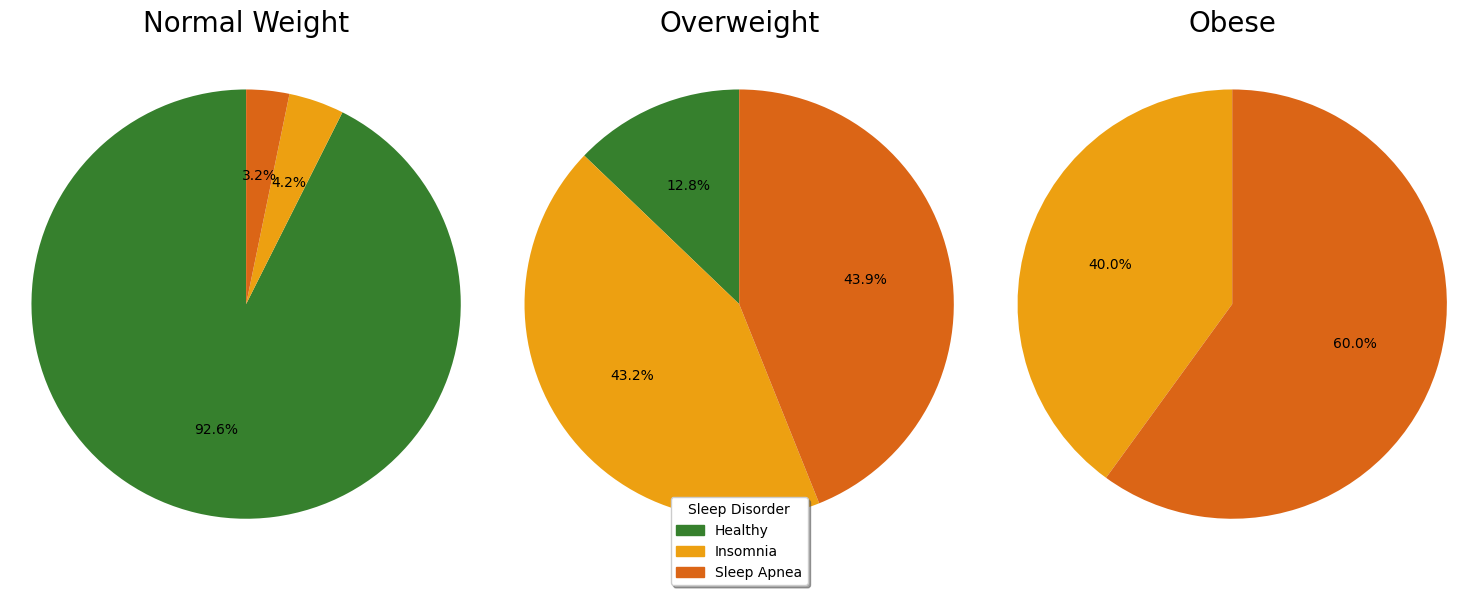

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

df['BMI Category'] = df['BMI Category'].replace({'Normal': 'Normal Weight'})
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Healthy')

tabela = (
    df.groupby(['BMI Category', 'Sleep Disorder'])
      .size()
      .reset_index(name='contagem')
)

ordem_categorias = ['Healthy', 'Sleep Apnea', 'Insomnia']
tabela['Sleep Disorder'] = pd.Categorical(tabela['Sleep Disorder'],
                                          categories=ordem_categorias,
                                          ordered=True)


tabela['Proporcao'] = tabela.groupby('BMI Category')['contagem'].transform(lambda x: x / x.sum())

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

mapeamento_cores = {
    'Healthy': '#36802d',
    'Insomnia': '#eda011',
    'Sleep Apnea': '#db6516'
}

todas_disordens = sorted(df['Sleep Disorder'].unique())
mapeamento_cores_auto = {produto: mapeamento_cores[produto] for produto in todas_disordens}

ordem = ['Normal Weight', 'Overweight', 'Obese']
for i, categoria in enumerate(ordem):
    data_categorias = tabela[tabela['BMI Category'] == categoria]

    sizes = data_categorias['Proporcao']
    labels = data_categorias['Sleep Disorder']

    cores_para_plot = [mapeamento_cores_auto[produto] for produto in labels]

    axes[i].pie(sizes, labels=None, autopct='%1.1f%%', colors=cores_para_plot, startangle=90)
    axes[i].set_title(f'{categoria}', size=20)
    axes[i].axis('equal')


legend_handles = []
for produto in todas_disordens:
    handle = mpatches.Patch(color=mapeamento_cores_auto[produto], label=produto)
    legend_handles.append(handle)


fig.legend(handles=legend_handles,
           title="Sleep Disorder",
           loc="lower center",
           fancybox=True, shadow=True)
plt.tight_layout(pad=1.5)

plt.show()

#Plot Stresse x Ocupação **Pergunta 2**

In [ ]:
def categorizar_stress(x):
    if 0 <= x <= 4:
        return 'Baixo'
    elif 4 <= x <= 6:
        return 'Médio'
    else:
        return 'Alto'


df['Occupation'] = df['Occupation'].replace('Salesperson', 'Sales Representative')


df['Categoria Stress'] = df['Stress Level'].apply(categorizar_stress)

tabela = (
    df.groupby(['Occupation', 'Categoria Stress'])
      .size()
      .reset_index(name='contagem')
)
ordem_categorias = ['Baixo', 'Médio','Alto']
tabela['Categoria Stress'] = pd.Categorical(tabela['Categoria Stress'],
                                            categories=ordem_categorias,
                                            ordered=True)

tabela['Proporcao'] = tabela.groupby('Occupation')['contagem'].transform(lambda x: x / x.sum())

import plotly.express as px
print(px.colors.qualitative.Pastel1)
cores = {
    'Alto': '#d83317',
    'Médio': '#f38e41',
    'Baixo': 'lightyellow'
}

fig = px.bar(
    tabela,
    x='Occupation',
    y='Proporcao',
    color='Categoria Stress',
    color_discrete_map=cores,
    category_orders={'Categoria Stress': ['Baixo', 'Médio', 'Alto']},  # ordem do stack
    title='Distribuição Normalizada de Níveis de Stress por Ocupação',
    text='contagem',
)

fig.update_layout(
    barmode='stack',
    yaxis=dict(title='Proporção', tickformat='.0%'),
    xaxis_title='Ocupação',
    legend_title='Nível de Stress',
    title_x=0.5,
    height = 1000
)

fig.show()
fig.write_image("grafico_stress.png", scale=2)

['rgb(251,180,174)', 'rgb(179,205,227)', 'rgb(204,235,197)', 'rgb(222,203,228)', 'rgb(254,217,166)', 'rgb(255,255,204)', 'rgb(229,216,189)', 'rgb(253,218,236)', 'rgb(242,242,242)']


ValueError: 
Image export using the "kaleido" engine requires the Kaleido package,
which can be installed using pip:

    $ pip install --upgrade kaleido


In [ ]:
def categorizar_stress(x):
    if 0 <= x <= 4:
        return 'Baixo'
    elif 4 < x <= 6:
        return 'Médio'
    else:
        return 'Alto'

df['Occupation'] = df['Occupation'].replace('Salesperson', 'Sales Representative')

def categorize_occupation_area(occupation):
    if occupation in ['Doctor', 'Nurse']:
        return 'Healthcare'
    elif occupation in ['Teacher']:
        return 'Education'
    elif occupation in ['Accountant', 'Engineer', 'Software Engineer', 'Scientist']:
        return 'STEM'
    else:
        return 'Other'

df['Occupation Area'] = df['Occupation'].apply(categorize_occupation_area)



df['Categoria Stress'] = df['Stress Level'].apply(categorizar_stress)

tabela = (
    df.groupby(['Occupation Area', 'Categoria Stress'])
      .size()
      .reset_index(name='contagem')
)
ordem_categorias = ['Baixo', 'Médio','Alto']
tabela['Categoria Stress'] = pd.Categorical(tabela['Categoria Stress'],
                                            categories=ordem_categorias,
                                            ordered=True)

tabela['Proporcao'] = tabela.groupby('Occupation Area')['contagem'].transform(lambda x: x / x.sum())

import plotly.express as px
print(px.colors.qualitative.Pastel1)
cores = {
    'Alto': '#d83317',
    'Médio': '#f38e41',
    'Baixo': 'lightyellow'
}

fig = px.bar(
    tabela,
    x='Occupation Area',
    y='Proporcao',
    color='Categoria Stress',
    color_discrete_map=cores,
    category_orders={'Categoria Stress': ['Baixo', 'Médio', 'Alto']},
    title='Distribuição Normalizada de Níveis de Stress por Área de Ocupação',
    text='contagem',
)

fig.update_layout(
    barmode='stack',
    yaxis=dict(title='Proporção', tickformat='.0%'),
    xaxis_title='Área de Ocupação',
    legend_title='Nível de Stress',
    title_x=0.5,
    height = 1000
)

fig.show()


['rgb(251,180,174)', 'rgb(179,205,227)', 'rgb(204,235,197)', 'rgb(222,203,228)', 'rgb(254,217,166)', 'rgb(255,255,204)', 'rgb(229,216,189)', 'rgb(253,218,236)', 'rgb(242,242,242)']


In [ ]:
def categorize_occupation_area(occupation):
    if occupation in ['Doctor', 'Nurse']:
        return 'Healthcare'
    elif occupation == 'Teacher':
        return 'Education'
    elif occupation == 'Sales Representative':
        return 'Sales'
    elif occupation == 'Software Engineer':
        return 'Technology'
    elif occupation == 'Scientist':
        return 'Science'
    elif occupation == 'Lawyer':
        return 'Law'
    elif occupation == 'Accountant':
        return 'Finance'
    elif occupation == 'Manager':
        return 'Management'
    elif occupation == 'Engineer':
        return 'Engineering'
    else:
        return 'Other'

df['Occupation Area'] = df['Occupation'].apply(categorize_occupation_area)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Categoria Stress,Occupation Area,Sleep_Duration_noise,Stress_noise,Quality_noise
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Baixo,Healthcare,8.110744,2.889365,9.058193
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Baixo,Healthcare,8.138737,2.949210,8.898598
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Baixo,Healthcare,8.132319,2.849228,8.897220
341,342,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,Healthy,Baixo,Healthcare,8.328382,3.076531,8.760210
342,343,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,Healthy,Baixo,Healthcare,8.329499,3.224987,9.356955


In [ ]:
import plotly.graph_objects as go

occupation_areas = tabela_stress_area['Occupation Area'].unique()

fig = go.Figure()

for i, area in enumerate(occupation_areas):
    data_area = tabela_stress_area[tabela_stress_area['Occupation Area'] == area]

    fig.add_trace(go.Pie(
        values=data_area['Proporcao'],
        labels=data_area['Categoria Stress'],
        name=area,
        visible=(i == 0),
        domain={'x': [0, 1], 'y': [0, 1]},
        hoverinfo='label+percent+value',
        textinfo='percent+label',
        insidetextorientation='radial'
    ))

buttons = []
for i, area in enumerate(occupation_areas):
    visible = [False] * len(occupation_areas)
    visible[i] = True
    buttons.append(dict(
        label=area,
        method="update",
        args=[{"visible": visible},
              {"title": f"Distribuição de Níveis de Stress para {area}"}]
    ))

fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        x=0.5,
        xanchor="center",
        y=1.15,
        yanchor="top"
    )],
    title="Distribuição de Níveis de Stress por Área de Ocupação",
    title_x=0.5,
    height=600
)

fig.show()

In [ ]:
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        x=0.5,
        xanchor="center",
        y=1.15,
        yanchor="top"
    )],
    title="Distribuição de Níveis de Stress por Área de Ocupação",
    title_x=0.5,
    height=600,
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    )
)

fig.show()

In [ ]:
tabela_stress_area['Proporcao'] = tabela_stress_area.groupby('Occupation Area')['contagem'].transform(lambda x: x / x.sum())
display(tabela_stress_area)

,Occupation Area,Categoria Stress,contagem,Proporcao
0,Education,Baixo,31,0.775000
1,Education,Médio,4,0.100000
2,Education,Alto,5,0.125000
3,Engineering,Baixo,43,0.682540
4,Engineering,Médio,17,0.269841
5,Engineering,Alto,3,0.047619
6,Finance,Baixo,28,0.756757
7,Finance,Médio,3,0.081081
8,Finance,Alto,6,0.162162
9,Healthcare,Baixo,39,0.270833


In [ ]:
tabela_stress_area = (
    df.groupby(['Occupation Area', 'Categoria Stress'])
      .size()
      .reset_index(name='contagem')
)
display(tabela_stress_area)

/tmp/ipython-input-629945805.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Occupation Area,Categoria Stress,contagem
0,Education,Baixo,31
1,Education,Médio,4
2,Education,Alto,5
3,Engineering,Baixo,43
4,Engineering,Médio,17
5,Engineering,Alto,3
6,Finance,Baixo,28
7,Finance,Médio,3
8,Finance,Alto,6
9,Healthcare,Baixo,39


In [ ]:
def categorizar_stress(x):
    if 0 <= x <= 4:
        return 'Baixo'
    elif 4 < x <= 6:
        return 'Médio'
    else:
        return 'Alto'

df['Categoria Stress'] = df['Stress Level'].apply(categorizar_stress)
ordem_categorias = ['Baixo', 'Médio', 'Alto']
df['Categoria Stress'] = pd.Categorical(df['Categoria Stress'],
                                        categories=ordem_categorias,
                                        ordered=True)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Categoria Stress,Occupation Area,Sleep_Duration_noise,Stress_noise,Quality_noise
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Baixo,Healthcare,8.110744,2.889365,9.058193
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Baixo,Healthcare,8.138737,2.949210,8.898598
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Baixo,Healthcare,8.132319,2.849228,8.897220
341,342,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,Healthy,Baixo,Healthcare,8.328382,3.076531,8.760210
342,343,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,Healthy,Baixo,Healthcare,8.329499,3.224987,9.356955


In [ ]:
!pip install -U plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [ ]:
!pip install -U kaleido

#Plots Stresse X Sono **Pergunta 4**

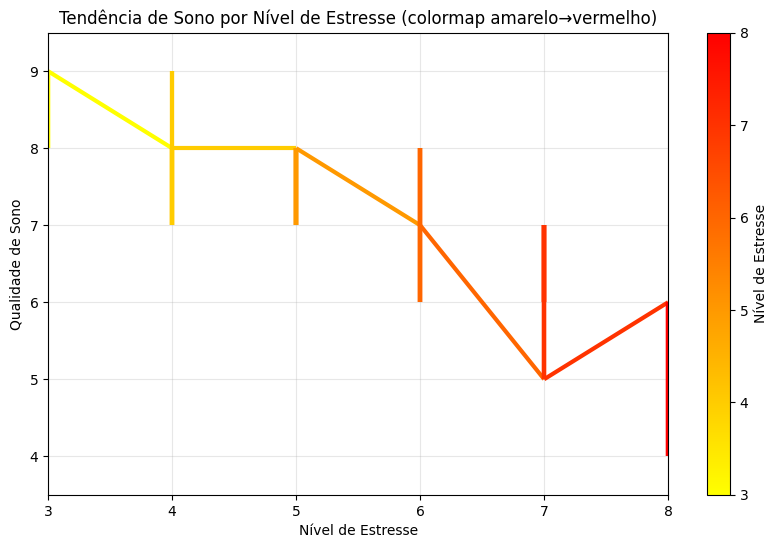

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
df = df.sort_values('Stress Level')
cmap = plt.cm.autumn_r
norm = mpl.colors.Normalize(vmin=df['Stress Level'].min(), vmax=df['Stress Level'].max())

points = np.array([df['Stress Level'], df['Quality of Sleep']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

from matplotlib.collections import LineCollection
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(df['Stress Level'])
lc.set_linewidth(3)

fig, ax = plt.subplots(figsize=(10, 6))
line = ax.add_collection(lc)

ax.set_xlim(df['Stress Level'].min(), df['Stress Level'].max())
ax.set_ylim(df['Quality of Sleep'].min() - 0.5, df['Quality of Sleep'].max() + 0.5)
ax.set_xlabel('Nível de Estresse')
ax.set_ylabel('Qualidade de Sono')
ax.set_title('Tendência de Sono por Nível de Estresse (colormap amarelo→vermelho)')


cbar = plt.colorbar(lc, ax=ax)
cbar.set_label('Nível de Estresse')

plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import statsmodels.api as sm

df['Sleep_Duration_noise'] = df['Sleep Duration'] + np.random.normal(0, 0.1, size=len(df))
df['Stress_noise'] = df['Stress Level'] + np.random.normal(0, 0.1, size=len(df))


fig = px.scatter(
    df,
    x='Sleep_Duration_noise',
    y='Stress_noise',
    color='Stress Level',
    hover_name='Person ID',
    hover_data={
        'Sleep_Duration_noise': False,
        'Stress_noise': False,
        'Sleep Duration': True,
        'Stress Level': True,
        'Age': True,
        'Occupation': True,
        'Quality of Sleep': True,
        'BMI Category': True,
        'Sleep Disorder': True,
    },
    title='Nível de stress por horas de sono (dados com ruído e interativo)',
    labels={
        'Sleep_Duration_noise': 'Horas de Sono',
        'Stress_noise': 'Nível de Stress',
        'Stress Level': 'Nível de Stress'
    },
    color_continuous_scale=px.colors.diverging.RdYlGn_r
)


X = df['Sleep Duration']
y = df['Stress Level']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

x_range = np.linspace(df['Sleep Duration'].min(), df['Sleep Duration'].max(), 100)
x_range_const = sm.add_constant(x_range)
y_pred_range = model.predict(x_range_const)



fig.add_trace(go.Scatter(
    x=x_range,
    y=y_pred_range,
    mode='lines',
    name='Regressão Linear',
    line=dict(color='black', width=2.5),
    hoverinfo='skip'
))


fig.update_layout(
    xaxis_title='Horas de Sono',
    yaxis_title='Nível de Stress',
    title_x=0.5,
    height = 600,
    legend=dict(
        x=1.02,
        y=1.02,
        xanchor='left',
        yanchor='top'
    )
)

fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from scipy.interpolate import make_interp_spline
import numpy as np


df['Quality_noise'] = df['Quality of Sleep'] + np.random.normal(0, 0.2, size=len(df))
df['Stress_noise'] = df['Stress Level'] + np.random.normal(0, 0.2, size=len(df))


fig = px.scatter(
    df,
    x='Quality_noise',
    y='Stress_noise',
    color='Sleep Duration',
    hover_name='Person ID',
    hover_data={
        'Quality_noise': False,
        'Stress_noise': False,
        'Quality of Sleep': True,
        'Stress Level': True,
        'Age': True,
        'Occupation': True,
        'Sleep Duration': True,
        'BMI Category': True,
        'Sleep Disorder': True,
    },
    title='Nível de stress por qualidade do sono (dados com ruído e interativo)',
    labels={
        'Quality_noise': 'Qualidade do Sono',
        'Stress_noise': 'Nível de Stress',
        'Sleep Duration': 'Horas de Sono'
    },
    color_continuous_scale=px.colors.diverging.RdYlGn
)


df_media = (
    df.groupby('Quality of Sleep')[['Stress Level']]
      .mean()
      .reset_index()
      .sort_values('Quality of Sleep')
)

quality_med = df_media['Quality of Sleep'].values
stress_med = df_media['Stress Level'].values
x_smooth = np.linspace(quality_med.min(), quality_med.max(), 300)
spl = make_interp_spline(quality_med, stress_med, k=3)
y_smooth = spl(x_smooth)
fig.add_trace(go.Scatter(
    x=x_smooth,
    y=y_smooth,
    mode='lines',
    name='Média do Nível de Stress (Suavizada)',
    line=dict(color='black', width=2.5),
    hoverinfo='skip'
))

fig.update_layout(
    xaxis_title='Qualidade do Sono',
    yaxis_title='Nível de Stress',
    title_x=0.5,
    height = 600,
    legend=dict(
        x=1.02,
        y=1.02,
        xanchor='left',
        yanchor='top'
    )
)

fig.show()

In [ ]:
stress_qual=df[["Quality of Sleep","Stress Level"]]
print(stress_qual)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import statsmodels.api as sm


df['Sleep_Duration_noise'] = df['Sleep Duration']
df['Stress_noise'] = df['Stress Level']


df_freq = (
    df.groupby(['Sleep Duration', 'Stress Level'])
      .size()
      .reset_index(name='freq_calculated')
)


df = df.merge(df_freq, on=['Sleep Duration', 'Stress Level'], how='left', suffixes=('_x', '_y'))

fig = px.scatter(
    df,
    x='Sleep_Duration_noise',
    y='Stress_noise',
    color='Stress Level',
    size='freq_calculated',
    hover_name='Person ID',
    hover_data={
        'Sleep_Duration_noise': False,
        'Stress_noise': False,
        'Sleep Duration': True,
        'Stress Level': True,
        'Age': True,
        'Occupation': True,
        'Quality of Sleep': True,
        'BMI Category': True,
        'Sleep Disorder': True,
        'freq_calculated': True
    },
    title='Nível de stress por horas de sono (pontos proporcionais à frequência)',
    labels={
        'Sleep_Duration_noise': 'Horas de Sono',
        'Stress_noise': 'Nível de Stress',
        'Stress Level': 'Nível de Stress',
        'freq_calculated': 'Frequência'
    },
    color_continuous_scale=px.colors.diverging.RdYlGn_r
)


X = sm.add_constant(df['Sleep Duration'])
y = df['Stress Level']
model = sm.OLS(y, X).fit()

x_range = np.linspace(df['Sleep Duration'].min(), df['Sleep Duration'].max(), 100)
x_range_const = sm.add_constant(x_range)
y_pred_range = model.predict(x_range_const)


fig.add_trace(go.Scatter(
    x=x_range,
    y=y_pred_range,
    mode='lines',
    name='Regressão Linear',
    line=dict(color='black', width=2.5),
    hoverinfo='skip'
))


fig.update_layout(
    xaxis_title='Horas de Sono',
    yaxis_title='Nível de Stress',
    title_x=0.5,
    height=600,
    legend=dict(
        x=1.02,
        y=1.02,
        xanchor='left',
        yanchor='top'
    )
)

fig.show()

In [ ]:
from matplotlib import pyplot as plt

plt.plot( 'Quality of Sleep', 'Stress Level', data=stress_qual, linestyle='none', marker='o')
plt.title('Quality of Sleep vs Stress Level')
plt.xlabel('Quality of Sleep')
plt.ylabel('Stress Level')
plt.show()

In [ ]:
sns.stripplot(data=stress_qual, x="Stress Level", y="Quality of Sleep", jitter=0.2, size=2)
plt.show()

Parte do Trabalho ~ Stress


In [ ]:
from sklearn.preprocessing import LabelEncoder
trabalho_stress=df[["Occupation","Stress Level"]]
le = LabelEncoder()
trabalho_stress['Occupation'] = le.fit_transform(trabalho_stress['Occupation'])
print(trabalho_stress)

plt.plot( 'Occupation', 'Stress Level', data=trabalho_stress, linestyle='none', marker='o')
plt.title('Occupation vs Stress Level')
plt.xlabel('Occupation')
plt.ylabel('Stress Level')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
stresoc = df[df['Stress Level'] > 7]['Occupation'].value_counts().index[:5]
fig1, ax1 = plt.subplots()
porc = df[df['Stress Level'] > 7]['Occupation'].value_counts().values[:5]
ax1.pie(porc,
        labels=stresoc,
        autopct='%1.1f%%')
print(porc)
print(stresoc)

profissoes = ['Doctor', 'Nurse', 'Sales Representative', 'Scientist','Software Engineer']
subset = df[df["Occupation"].isin(profissoes)]
media_stress = subset.groupby("Occupation")["Stress Level"].mean().reset_index()
print(media_stress)
ax1.pie(porc,
        labels=media_stress,
        autopct='%1.1f%%')
print(porc)
print(stresoc)

In [ ]:
!pip install -U dython

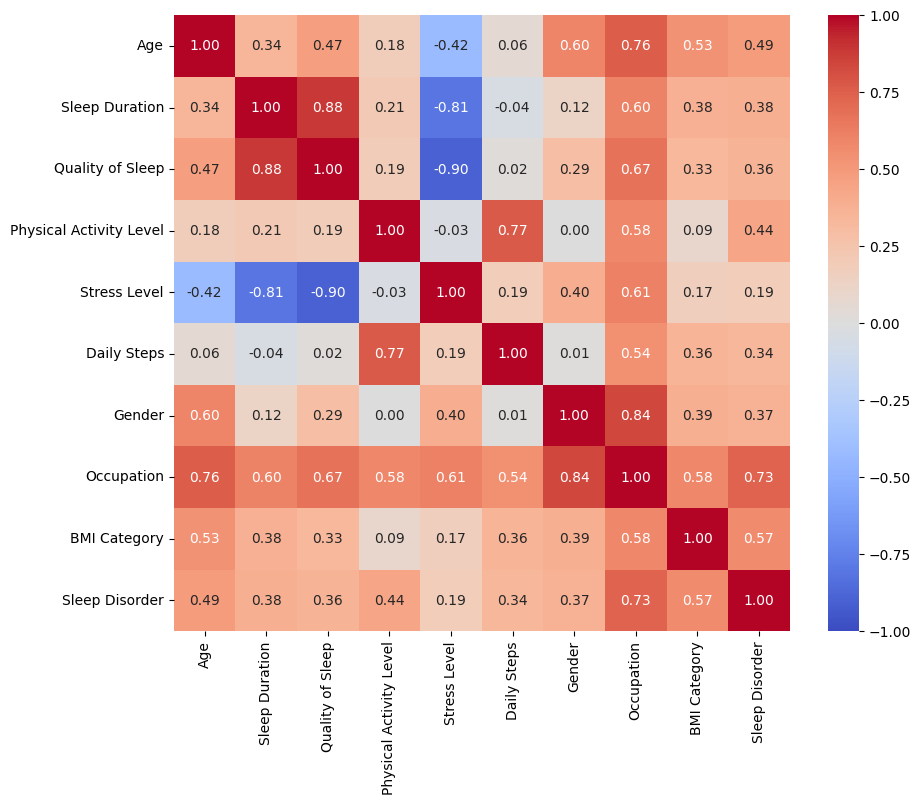

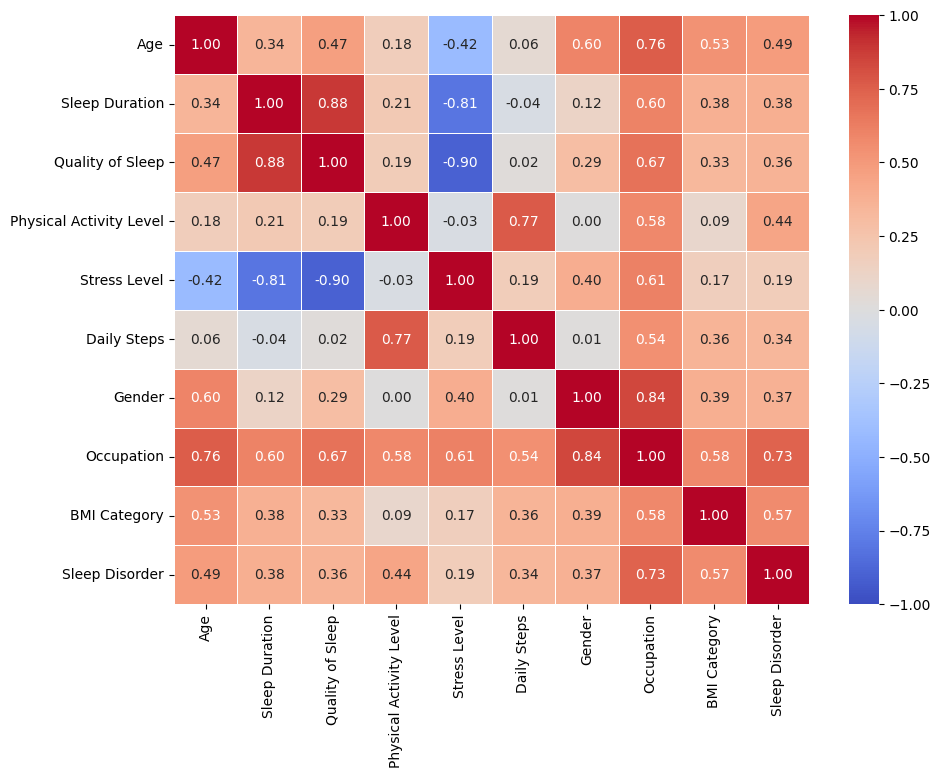

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations

df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Healthy')

stress_qual = df[["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Daily Steps"]]
gender = pd.DataFrame(data=df['Gender'], columns=['Gender'])
occupation = pd.DataFrame(data=df['Occupation'], columns=['Occupation'])
bmi = pd.DataFrame(data=df['BMI Category'], columns=['BMI Category'])
disorder = pd.DataFrame(data=df['Sleep Disorder'], columns=['Sleep Disorder'])

df_final = pd.concat([stress_qual, gender, occupation, bmi, disorder], axis=1)

# print(df_final)

valores_assoc = associations(
    df_final,
    nominal_columns='auto',
    figsize=(10, 8),
    cmap='coolwarm',
    nan_strategy='drop_sample_pairs',
    plot=False
)

tabela_correlacao = valores_assoc['corr']

plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(
    tabela_correlacao,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    cbar=True,
    linewidths=.5,
    vmin=-1,
    vmax=1
)


plt.xticks(rotation=90)
plt.tight_layout(pad=1.5)


plt.show()


In [ ]:
def categorize_occupation_area(occupation):
    if occupation in ['Doctor', 'Nurse']:
        return 'Healthcare'
    elif occupation == 'Teacher':
        return 'Education'
    elif occupation == 'Sales Representative':
        return 'Sales'
    elif occupation == 'Software Engineer':
        return 'Technology'
    elif occupation == 'Scientist':
        return 'Science'
    elif occupation == 'Lawyer':
        return 'Law'
    elif occupation == 'Accountant':
        return 'Finance'
    elif occupation == 'Manager':
        return 'Management'
    elif occupation == 'Engineer':
        return 'Engineering'
    else:
        return 'Other'

df['Occupation Area'] = df['Occupation'].apply(categorize_occupation_area)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Categoria Stress,Occupation Area
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Healthy,Médio,Technology
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,Healthy,Alto,Healthcare
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,Healthy,Alto,Healthcare
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Alto,Sales
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Alto,Sales


In [ ]:
def categorizar_stress(x):
    if 0 <= x <= 4:
        return 'Baixo'
    elif 4 < x <= 6:
        return 'Médio'
    else:
        return 'Alto'

df['Categoria Stress'] = df['Stress Level'].apply(categorizar_stress)
ordem_categorias = ['Baixo', 'Médio', 'Alto']
df['Categoria Stress'] = pd.Categorical(df['Categoria Stress'],
                                        categories=ordem_categorias,
                                        ordered=True)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Categoria Stress,Occupation Area
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Healthy,Médio,Technology
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,Healthy,Alto,Healthcare
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,Healthy,Alto,Healthcare
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Alto,Sales
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Alto,Sales


In [ ]:
tabela_stress_area = (
    df.groupby(['Occupation Area', 'Categoria Stress'])
      .size()
      .reset_index(name='contagem')
)
display(tabela_stress_area)

/tmp/ipython-input-629945805.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Occupation Area,Categoria Stress,contagem
0,Education,Baixo,31
1,Education,Médio,4
2,Education,Alto,5
3,Engineering,Baixo,43
4,Engineering,Médio,17
5,Engineering,Alto,3
6,Finance,Baixo,28
7,Finance,Médio,3
8,Finance,Alto,6
9,Healthcare,Baixo,39


In [ ]:
tabela_stress_area['Proporcao'] = tabela_stress_area.groupby('Occupation Area')['contagem'].transform(lambda x: x / x.sum())
display(tabela_stress_area)

,Occupation Area,Categoria Stress,contagem,Proporcao
0,Education,Baixo,31,0.775000
1,Education,Médio,4,0.100000
2,Education,Alto,5,0.125000
3,Engineering,Baixo,43,0.682540
4,Engineering,Médio,17,0.269841
5,Engineering,Alto,3,0.047619
6,Finance,Baixo,28,0.756757
7,Finance,Médio,3,0.081081
8,Finance,Alto,6,0.162162
9,Healthcare,Baixo,39,0.270833


In [ ]:
import plotly.graph_objects as go

occupation_areas = tabela_stress_area['Occupation Area'].unique()

fig = go.Figure()

for i, area in enumerate(occupation_areas):
    data_area = tabela_stress_area[tabela_stress_area['Occupation Area'] == area]

    fig.add_trace(go.Pie(
        values=data_area['Proporcao'],
        labels=data_area['Categoria Stress'],
        name=area,
        visible=(i == 0),
        domain={'x': [0, 1], 'y': [0, 1]},
        hoverinfo='label+percent+value',
        textinfo='percent+label',
        insidetextorientation='radial'
    ))

buttons = []
for i, area in enumerate(occupation_areas):
    visible = [False] * len(occupation_areas)
    visible[i] = True
    buttons.append(dict(
        label=area,
        method="update",
        args=[{"visible": visible},
              {"title": f"Distribuição de Níveis de Stress para {area}"}]
    ))

fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        x=0.5,
        xanchor="center",
        y=1.15,
        yanchor="top"
    )],
    title="Distribuição de Níveis de Stress por Área de Ocupação",
    title_x=0.5,
    height=600
)

fig.show()

In [ ]:
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        x=0.5,
        xanchor="center",
        y=1.15,
        yanchor="top"
    )],
    title="Distribuição de Níveis de Stress por Área de Ocupação",
    title_x=0.5,
    height=600,
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    )
)

fig.show()

In [ ]:
df_dorms = df[['Stress Level', 'Sleep Duration']]


np.random.seed(42)
noise_x = np.random.normal(0, 0.1, size=len(df_dorms))
noise_y = np.random.normal(0, 0.1, size=len(df_dorms))

x = df_dorms['Stress Level'] + noise_x
y = df_dorms['Sleep Duration'] + noise_y

plt.figure(figsize=(8,5))
sns.regplot(
    x=x,
    y=y,
    scatter_kws={'color':'royalblue', 's':70, 'alpha':0.7, 'edgecolor':'black'},
    line_kws={'color':'red', 'lw':2},
)

plt.title('Relação entre Nível de Estresse e Duração do Sono', fontsize=13)
plt.xlabel('Nível de Estresse', fontsize=11)
plt.ylabel('Duração do Sono (horas)', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

